In [82]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap

In [84]:
# set seed
np.random.seed(0)

In [85]:
# creating HMM with gaussian observations
tsamples = 500
nstates = 5
nobs = 2

hmm = ssm.HMM(nstates, nobs, observations = 'gaussian')

thetas = np.linspace(0, 2 * np.pi, nstates, endpoint = False)
hmm.observations.mus = 3 * np.column_stack((np.cos(thetas), np.sin(thetas)))

In [86]:
# sampling from the HMM
states, obs = hmm.sample(tsamples)
loglike = hmm.log_probability(obs)

print(obs.shape)

(500, 2)


Text(0.5, 1.0, 'observation distributions')

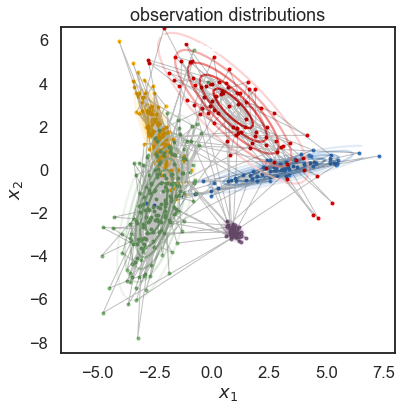

In [87]:
# plotting the observations distributions 
lim = .85 * abs(obs).max()
XX, YY = np.meshgrid(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100))
data = np.column_stack((XX.ravel(), YY.ravel()))
mask = np.ones_like(data, dtype=bool)
input = np.zeros((data.shape[0], 0))
tag = None 
lls = hmm.observations.log_likelihoods(data, input, mask, tag)

plt.figure(figsize=(6, 6))
for kk in range(nstates):
    plt.contour(XX, YY, np.exp(lls[:,kk]).reshape(XX.shape), cmap = white_to_color_cmap(colors[kk]))
    plt.plot(obs[states == kk, 0], obs[states == kk, 1], 'o', mfc = colors[kk], mec = 'none', ms = 4)
    
plt.plot(obs[:,0], obs[:,1], '-k', lw = 1, alpha=.25)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("observation distributions")

[1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 0 0 0 4 4 1 1 1 1 1 2 3 3 3
 3 3 3 3 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 2 3 3 3 3 3 3 3 3 3 3 2 2 2
 3 3 3 3 3 3 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 0 3 3 4 4 4 4 4 4 4 0
 0 0 0 4 1 3 2 2 2 2 2 1 1 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 3 3 3 3 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 4 4 4 3 3 3 3 3 3 

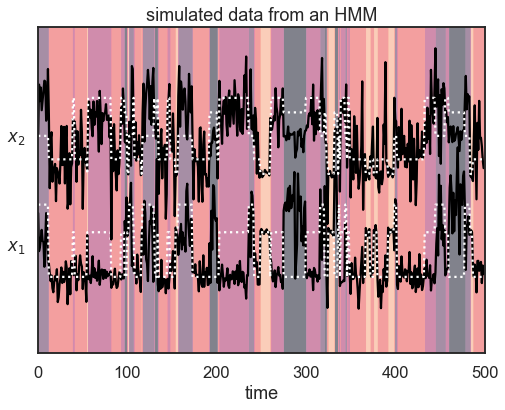

In [103]:
# plot state patches for each time point
lim = 1.05 * abs(obs).max()
plt.figure(figsize=(8, 6))
plt.imshow(states[None,:], 
           extent=(0, tsamples, -lim, (nobs)*lim),
           aspect = 'auto',
           vmin = 0,
           vmax = len(colors)-1, 
           alpha = .5)

# plot observations and mean value of the distribution they were drawn from
mus_states = hmm.observations.mus[states]
for d in range(nobs):
    plt.plot(obs[:,d] + lim * d, '-k')
    plt.plot(mus_states[:,d] + lim * d, ':w')

# axis options
plt.xlim(0, tsamples)
plt.xlabel("time")
plt.yticks(lim * np.arange(nobs), ["$x_{}$".format(d+1) for d in range(nobs)])
plt.title("simulated data from an HMM")

print(states)
print(len(colors)-1)

  0%|          | 0/50 [00:00<?, ?it/s]

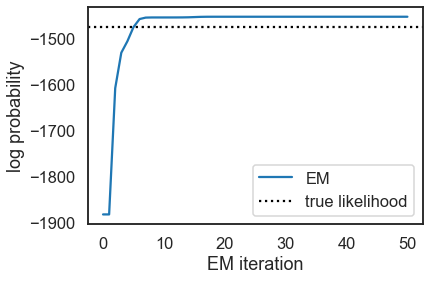

In [89]:
# fit HMM to created data
niters = 50
hmmfit = ssm.HMM(nstates, nobs, observations = 'gaussian') # how is this different than before?
hmmfit_lls = hmmfit.fit(obs, method = 'em', num_iters = niters, init_method = 'kmeans')

# plot likelihood convergence
plt.plot(hmmfit_lls, label = "EM")
plt.axhline(loglike, color = 'k', linestyle = ':', label = "true likelihood")
plt.xlabel("EM iteration")
plt.ylabel("log probability")
plt.legend(loc = "lower right")
plt.show()

# Q: what does it mean not converging to the true value?

Text(0.5, 0, 'time')

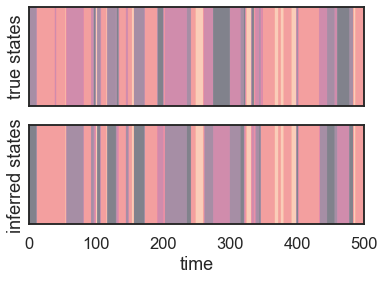

In [90]:
# comparing expected and true states
expected_states = hmmfit.most_likely_states(obs)
hmm.permute(find_permutation(states, expected_states)) # check this function with jeff

plt.figure()
plt.subplot(211)

plt.imshow(states[None,:], aspect = "auto", vmin = 0, vmax = len(colors) - 1, alpha = .5)
plt.xlim(0, tsamples)
plt.ylabel('true states')
plt.yticks([])
plt.xticks([])

plt.subplot(212)
plt.imshow(expected_states[None,:], aspect= "auto", vmin = 0, vmax = len(colors)-1, alpha = .5)
plt.xlim(0, tsamples)
plt.ylabel('inferred states')
plt.yticks([])
plt.xlabel("time")

Text(0.5, 0, 'time')

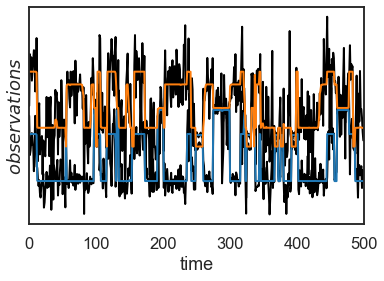

In [91]:
# plotting smooth observations
hmmsmooth = hmmfit.smooth(obs)

plt.figure()
plt.plot(obs + 3 * np.arange(nobs), '-k', lw = 2)
plt.plot(hmmsmooth + 3 * np.arange(nobs), '-', lw=2)
plt.xlim(0, tsamples)
plt.ylabel("$observations$")
plt.yticks([])
plt.xlabel("time")

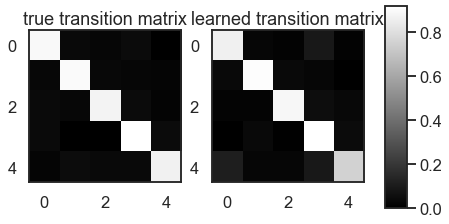

In [92]:
# true and learned transition matrix
A = hmm.transitions.transition_matrix
Ahat = hmmfit.transitions.transition_matrix

fig = plt.figure()
plt.subplot(121)

im = plt.imshow(A, cmap = 'gray')
plt.title("true transition matrix")

plt.subplot(122)
im = plt.imshow(Ahat, cmap='gray')
plt.title("learned transition matrix")

# defining same axis for both
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(im, cax = cbar_ax)
plt.show()